<a href="https://colab.research.google.com/github/artanebibi/datascience/blob/main/Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import KFold

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/refs/heads/master/BostonHousing.csv")
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
df.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


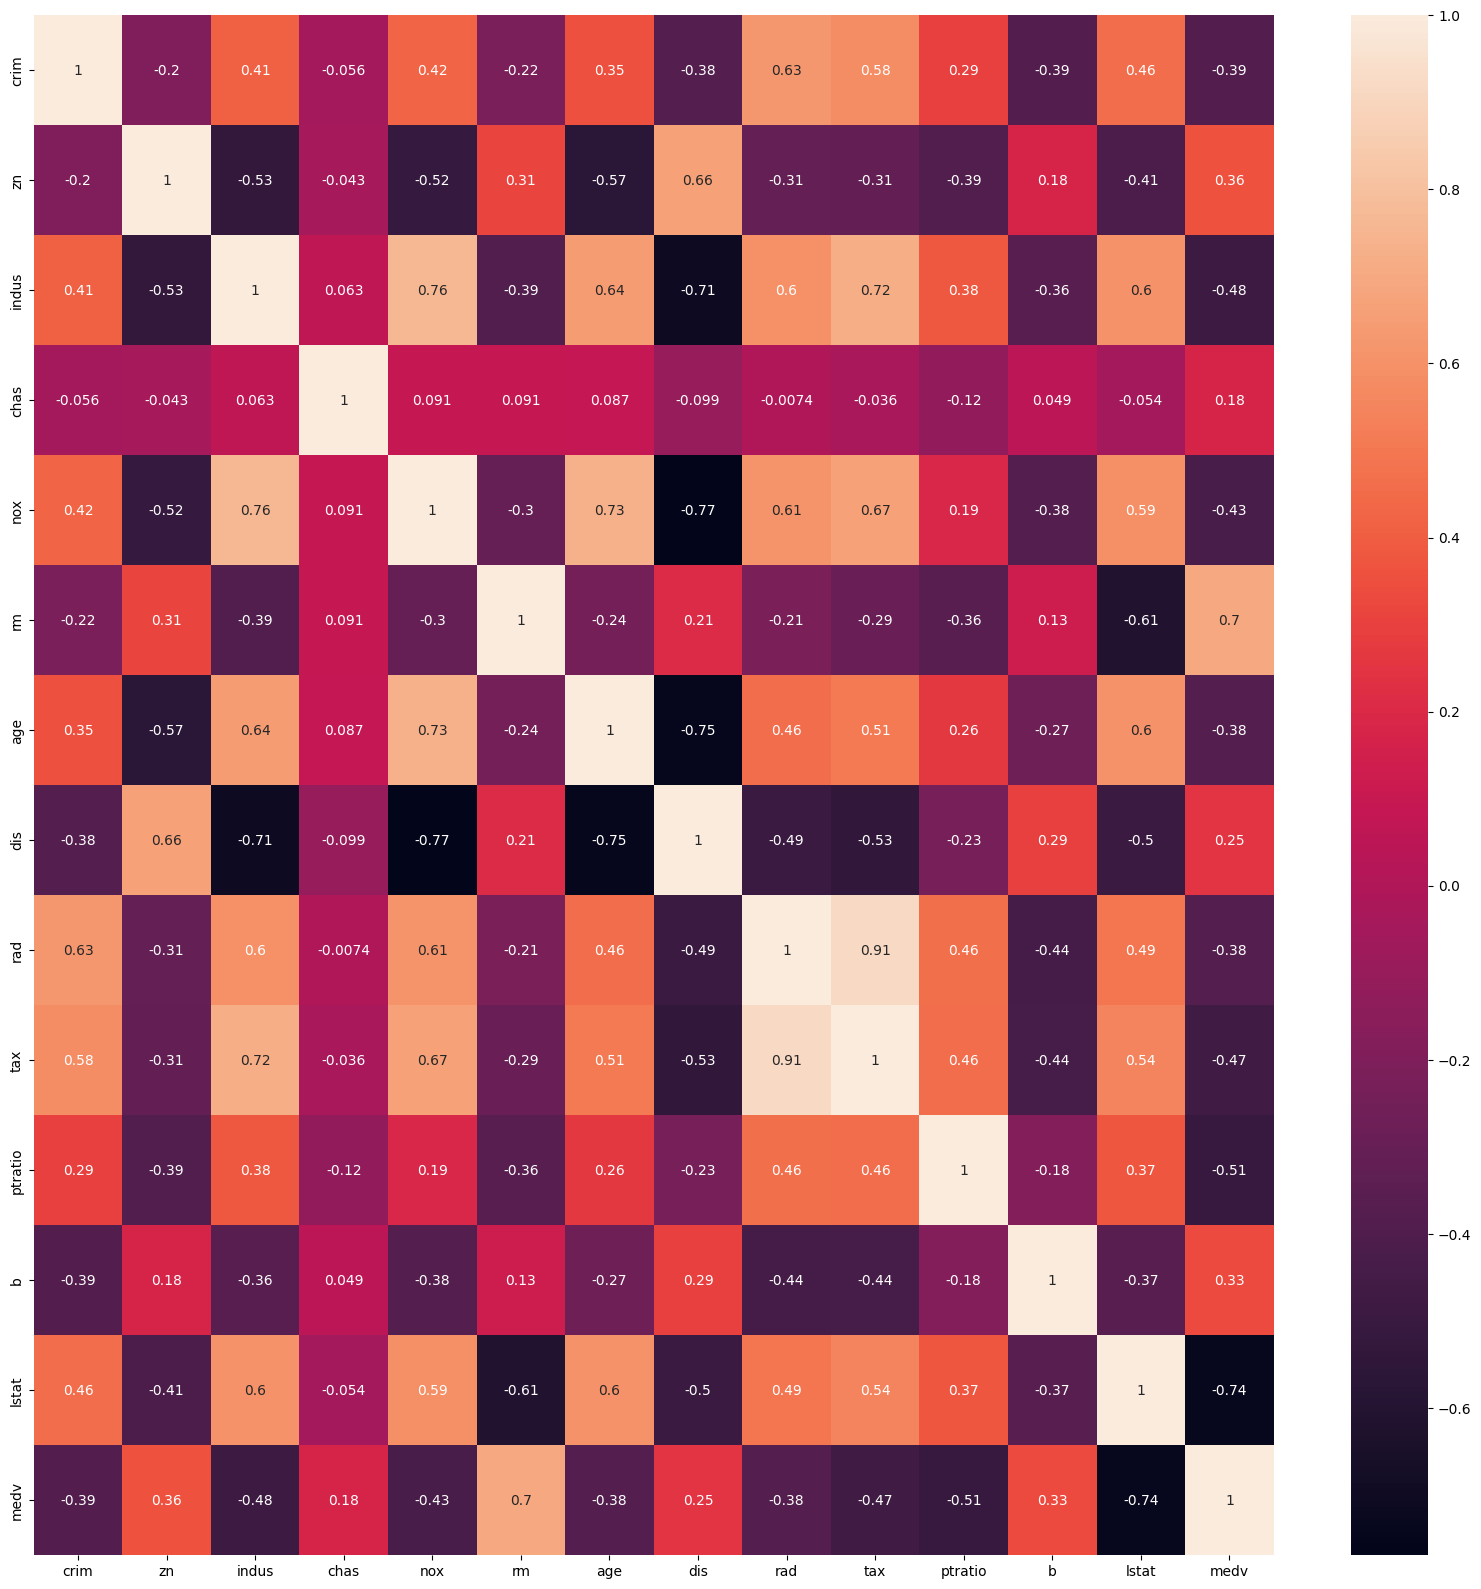

In [4]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot = True)
plt.show()

I am going to select first the features which have > 0.3 or < - 0.3 Pearsons correlation WITH the target feature.

In [5]:
features = ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'rad', 'tax', 'ptratio', 'b', 'lstat']

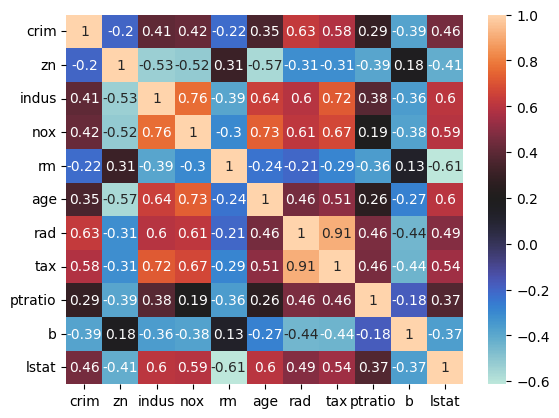

In [6]:
sns.heatmap(df[features].corr(), annot = True, cmap = 'icefire')
plt.show()

In [7]:
selected = ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'tax', 'ptratio', 'b', 'lstat'] # getting rid of tax cuz of 0.91 correlation with rad

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, r2_score
x, y = df[selected], df['medv']
trainx, testx, trainy, testy = train_test_split(x,y,test_size=0.2, random_state=1)

In [9]:
model = LinearRegression()
model.fit(trainx, trainy)
print(r2_score(testy, model.predict(testx)))

0.7065598188848199


In [10]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
model = LinearRegression()
model.fit(poly.fit_transform(trainx), trainy)
print(r2_score(testy, model.predict(poly.fit_transform(testx))))

0.8525108619133297


In [11]:
scores = []
kfold = KFold(n_splits=5)
for train_index, test_index in kfold.split(x):
    X_train, Y_train = x.values[train_index], y.values[train_index]
    X_test, Y_test = x.values[test_index], y.values[test_index]
    model = LinearRegression()
    model.fit(poly.fit_transform(X_train), Y_train)
    preds = model.predict(poly.fit_transform(X_test))
    scores.append(r2_score(Y_test, preds))

In [12]:
scores

[0.394798823449779,
 0.1954314424799104,
 0.6217094258936805,
 0.35782263243411727,
 -5.903126632946546]

In [70]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'max_depth': [3, 5, 7],
    'criterion': ['absolute_error', 'squared_error', 'poisson', 'friedman_mse']
}


In [71]:
import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
estimator = DecisionTreeRegressor()


In [72]:
from sklearn.metrics import r2_score
estimator.fit(trainx, trainy)
y_pred = estimator.predict(testx)
print(r2_score(testy, y_pred))

0.8265930828098685


In [73]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring='r2',
    n_jobs=1,
    cv=10,
    verbose=0,
)


In [74]:
grid_search.fit(x, y) # error i have no idea why

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=1,
             param_grid={'criterion': ['absolute_error', 'squared_error',
                                       'poisson', 'friedman_mse'],
                         'max_depth': [3, 5, 7]},
             scoring='r2')

In [79]:
grid_search.best_score_

0.27756064807826386